In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

# CompSol blendings 

attr=rho, mt=1.0_mean, ct=rho_conv, norm=0.0053002
attr=rho, mt=1.0_mean, ct=theta_conv, norm=0.0015869
attr=rho, mt=rhoY_mean, ct=rho_conv, norm=0.0053002
attr=rho, mt=rhoY_mean, ct=theta_conv, norm=0.0015869
attr=rhou, mt=1.0_mean, ct=rho_conv, norm=0.0057121
attr=rhou, mt=1.0_mean, ct=theta_conv, norm=0.0018568
attr=rhou, mt=rhoY_mean, ct=rho_conv, norm=0.0057121
attr=rhou, mt=rhoY_mean, ct=theta_conv, norm=0.0018568
attr=rhov, mt=1.0_mean, ct=rho_conv, norm=0.0054064
attr=rhov, mt=1.0_mean, ct=theta_conv, norm=0.0014146
attr=rhov, mt=rhoY_mean, ct=rho_conv, norm=0.0054064
attr=rhov, mt=rhoY_mean, ct=theta_conv, norm=0.0014146
attr=rhoY, mt=1.0_mean, ct=rho_conv, norm=0.0059803
attr=rhoY, mt=1.0_mean, ct=theta_conv, norm=0.0059843
attr=rhoY, mt=rhoY_mean, ct=rho_conv, norm=0.0059803
attr=rhoY, mt=rhoY_mean, ct=theta_conv, norm=0.0059843
attr=p2_nodes, mt=1.0_mean, ct=rho_conv, norm=0.0006162
attr=p2_nodes, mt=1.0_mean, ct=theta_conv, norm=0.0006095
attr=p2_nodes, mt=rhoY_mean, ct=rh

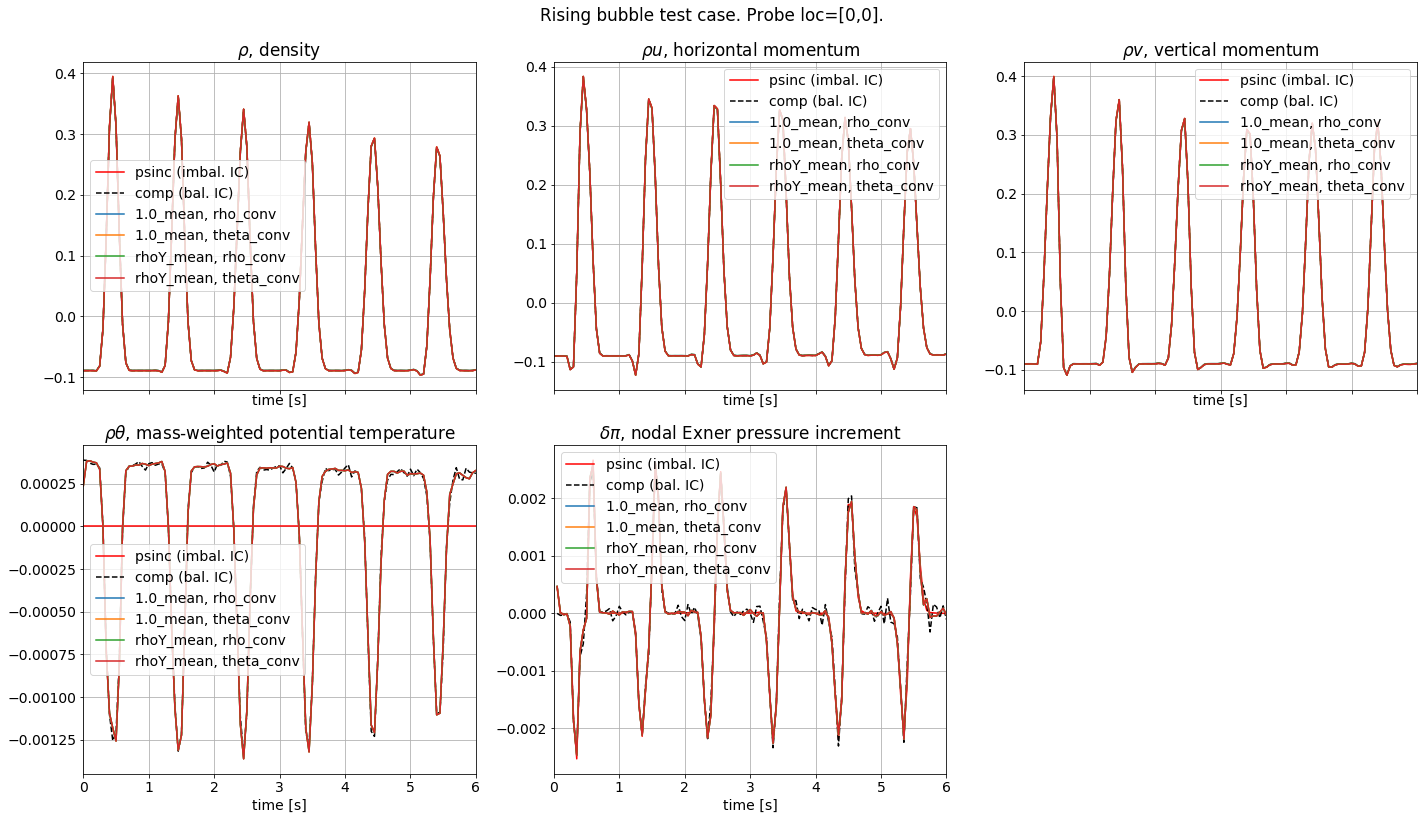

In [31]:
from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex/blending_shifts"
py_directory = "../%s/" %directory

Nx = 32
Ny = 32
et = 6.0
times = np.arange(0.0,et+0.05,0.05)
# times = times[6:]

probe_loc = [0,0]

ic = 'posp'
# ic = 'delth_1.0'

datyp = 'bo'
datyp = 'rloc'

meant = ['1.0_mean', 'rhoY_mean'] 
convt = ['rho_conv', 'theta_conv']
# convt = ['rho_conv']
# convt = ['theta_conv']

enstype = ['']

fn = '%s_%s_%s' %(base_fn,ic,datyp)

attributes = ['rho','rhou','rhov','rhoY','p2_nodes']
pl = pt.plotter_1d(figsize=(20,12),fontsize=14)

# attributes = ['p2_nodes']
# pl = pt.plotter_1d(figsize=(20,12),fontsize=18, ncols=1,nrows=1)

tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
    
di = pl.labels()
prt = utils.prt_time(debug=False)

avg = False
for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False
    t_axs = times if attribute != 'p2_nodes' else times[1:]

    psinc = tc.get_time_series(times, 1, attribute, 'psinc', probe_loc, label_type='TIME', diff=diff, avg=avg)
    truth = tc.get_time_series(times, 1, attribute, 'truthgen', probe_loc, label_type='TIME', diff=diff, avg=avg)
    comp = tc.get_time_series(times, 1, attribute, 'comp_bal', probe_loc, label_type='TIME', diff=diff, avg=avg)
    
#     enDA = tc.get_time_series(times, 10, attribute, '%s_%s' %(ic,datyp), probe_loc, label_type='TIME', diff=diff, avg=avg)
    
    psinc -= psinc.mean()
    comp -= comp.mean()
    enDA -= enDA.mean()
    
    ax = pl.get_ax(i)
    ax.plot(t_axs,psinc, 'r-', label='psinc (imbal. IC)')
    ax.plot(t_axs,comp, 'k--', label='comp (bal. IC)')
#     ax.plot(t_axs,enDA, label='enNoDA')
    
    for mt in meant:
        for ct in convt:
            sfx = '%s_%s_%s_%s' %(ic,datyp,ct,mt)
            sfx = tc.cb_suffix(1,0, sfx)
            res = tc.get_time_series(times, 1, attribute, sfx, probe_loc, label_type='TIME', diff=diff, avg=avg)
            
            res -= res.mean()
            res += psinc.mean()
            ax.plot(t_axs, res, '-', label='%s, %s' %(mt,ct))
            

#             psinc -= psinc.mean()
            print("attr=%s, mt=%s, ct=%s, norm=%.7f" %(attribute,mt,ct,np.linalg.norm(res-psinc)))

    ax.set_xlim([times[0],times[-1]])
    ax.set_title(di[attribute])
    ax.set_xlabel(r'time [s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    prt.prtt('plt')
    
ax = pl.get_ax(-1)
ax.remove()
    
str_ic = {'posp' : 'initial vortex position perturbation (RBC1)', 'delth_1.0' : 'initial density magnitude perturbation (RBC2)'}
str_datyp = {'bo' : 'batch observation', 'rloc' : 'grid-point localisation'}

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))
# plt.suptitle("%s test case, %s with %s. Probe loc=[%i,%i]." %("Rising bubble", str_ic[ic], str_datyp[datyp], probe_loc[0], probe_loc[1]))
plt.suptitle("%s test case. Probe loc=[%i,%i]." %("Rising bubble", probe_loc[0], probe_loc[1]))
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig('%s/%s.pdf' %(py_directory,fn))
plt.show()

# EnDA Blendings

attr=rhoY, mt=1.0_mean, ct=rho_conv, norm=0.0058994
attr=rhoY, mt=1.0_mean, ct=theta_conv, norm=0.0059113
attr=rhoY, mt=rhoY_mean, ct=rho_conv, norm=0.0097898
attr=rhoY, mt=rhoY_mean, ct=theta_conv, norm=0.0098164


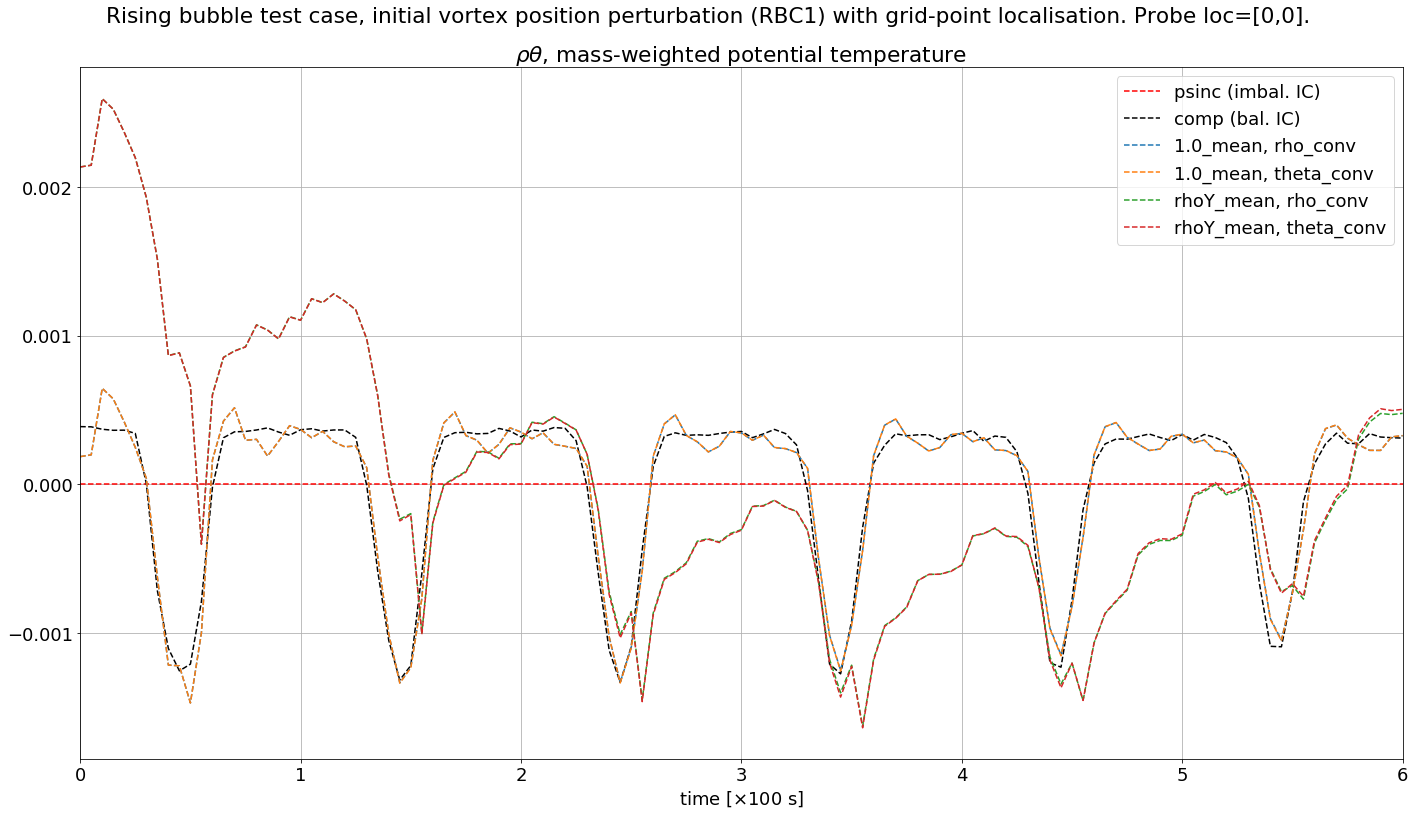

In [42]:
from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex/blending_shifts"
py_directory = "../%s/" %directory

Nx = 32
Ny = 32
et = 6.0
times = np.arange(0.0,et+0.05,0.05)
# times = times[6:]

probe_loc = [0,0]

ic = 'posp'
# ic = 'delth_1.0'

datyp = 'bo'
datyp = 'rloc'

meant = ['1.0_mean', 'rhoY_mean'] 
convt = ['rho_conv', 'theta_conv']
# convt = ['rho_conv']
# convt = ['theta_conv']

enstype = ['']

fn = '%s_%s_%s' %(base_fn,ic,datyp)

# attributes = ['rho','rhou','rhov','rhoY','p2_nodes']
# pl = pt.plotter_1d(figsize=(20,12),fontsize=14)

attributes = ['rhoY']
pl = pt.plotter_1d(figsize=(20,12),fontsize=18, ncols=1,nrows=1)

tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
    
di = pl.labels()
prt = utils.prt_time(debug=False)

avg = False
for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False
    t_axs = times if attribute != 'p2_nodes' else times[1:]

    psinc = tc.get_time_series(times, 1, attribute, 'psinc', probe_loc, label_type='TIME', diff=diff, avg=avg)
    truth = tc.get_time_series(times, 1, attribute, 'truthgen', probe_loc, label_type='TIME', diff=diff, avg=avg)
    comp = tc.get_time_series(times, 1, attribute, 'comp_bal', probe_loc, label_type='TIME', diff=diff, avg=avg)
    
    enDA = tc.get_time_series(times, 10, attribute, '%s_%s' %(ic,datyp), probe_loc, label_type='TIME', diff=diff, avg=avg)
    
    psinc -= psinc.mean()
    comp -= comp.mean()
    enDA -= enDA.mean()
    
    ax = pl.get_ax(i)
    ax.plot(t_axs,psinc, 'r--', label='psinc (imbal. IC)')
    ax.plot(t_axs,comp, 'k--', label='comp (bal. IC)')
#     ax.plot(t_axs,enDA, label='enNoDA')
    
    for mt in meant:
        for ct in convt:
            sfx = '%s_%s_%s_%s_%s' %(ic,datyp,'EnDAB',ct,mt)
            sfx = tc.cb_suffix(1,0, sfx)
            res = tc.get_time_series(times, 10, attribute, sfx, probe_loc, label_type='TIME', diff=diff, avg=avg)
            
            res -= res.mean()
            res += psinc.mean()
            ax.plot(t_axs, res, '--', label='%s, %s' %(mt,ct))
            

#             psinc -= psinc.mean()
            print("attr=%s, mt=%s, ct=%s, norm=%.7f" %(attribute,mt,ct,np.linalg.norm(res-psinc)))

    ax.set_xlim([times[0],times[-1]])
    ax.set_title(di[attribute])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    prt.prtt('plt')
    
# ax = pl.get_ax(-1)
# ax.remove()
    
str_ic = {'posp' : 'initial vortex position perturbation (RBC1)', 'delth_1.0' : 'initial density magnitude perturbation (RBC2)'}
str_datyp = {'bo' : 'batch observation', 'rloc' : 'grid-point localisation'}

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))
plt.suptitle("%s test case, %s with %s. Probe loc=[%i,%i]." %("Rising bubble", str_ic[ic], str_datyp[datyp], probe_loc[0], probe_loc[1]))
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig('%s/%s.pdf' %(py_directory,fn))
plt.show()